# Oriserve- Intern Data Scientist Assignment

- ## Subtheme Sentiment Analysis Task
* The task is to develop an approach that given a sample will identify the subthemes along with their respective sentiments.

# Table of Contents

### - install libraies
### - Use word cloud for moslty used words find in Reviews
### - To use Tokenization Methode for Best
### - Steps for Approach
### - Perform Sentiment Analysis Using Pie Chart ----> Primary Analysis Model sample Dataset
### - Graphical Representation for Text Columns First 10 Rows
### - Subtheme Sentimental Analysis ----->Fuction Create for Preprocessing Data Set using nltk
### - OutPut Graphical Representation
### - Result


In [1]:
# Start---- !

### Load Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

# Load DataSet
- check dataset loaded correct or not

In [3]:
df = pd.read_csv('Evaluation-dataset.csv')
df.head(3)

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(10131, 15)

### Add columns Name and Save another Csv_file - "Evaluation-dataset_2.csv"

In [5]:
# Add Header in Old dataset coln...............
header_list = []
for i in range(1,16):
    add = f'Colun_{i}'
    if add=='Colun_1':
        header_list.append('review')
    else:
        add1 = header_list.append(add)
        

In [6]:
df.to_csv('Evaluation-dataset_2.csv', header=header_list, index=False)

In [7]:
data = pd.read_csv("Evaluation-dataset_2.csv")
data.head(3)

,review,Colun_2,Colun_3,Colun_4,Colun_5,Colun_6,Colun_7,Colun_8,Colun_9,Colun_10,Colun_11,Colun_12,Colun_13,Colun_14,Colun_15
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.describe().T

,count,unique,top,freq
review,10131,10127,Easy to use website,2
Colun_2,8128,84,value for money positive,3334
Colun_3,4238,65,value for money positive,1113
Colun_4,1538,52,value for money positive,253
Colun_5,445,50,value for money positive,58
Colun_6,128,37,garage service positive,12
Colun_7,36,20,value for money positive,7
Colun_8,13,9,booking confusion negative,2
Colun_9,8,6,value for money positive,3
Colun_10,4,2,garage service positive,2


In [9]:
data.isnull().sum()

review          0
Colun_2      2003
Colun_3      5893
Colun_4      8593
Colun_5      9686
Colun_6     10003
Colun_7     10095
Colun_8     10118
Colun_9     10123
Colun_10    10127
Colun_11    10130
Colun_12    10130
Colun_13    10130
Colun_14    10130
Colun_15    10130
dtype: int64

### To Check Positive Words in Columns

### use word cloud for moslty used words find in Reviews

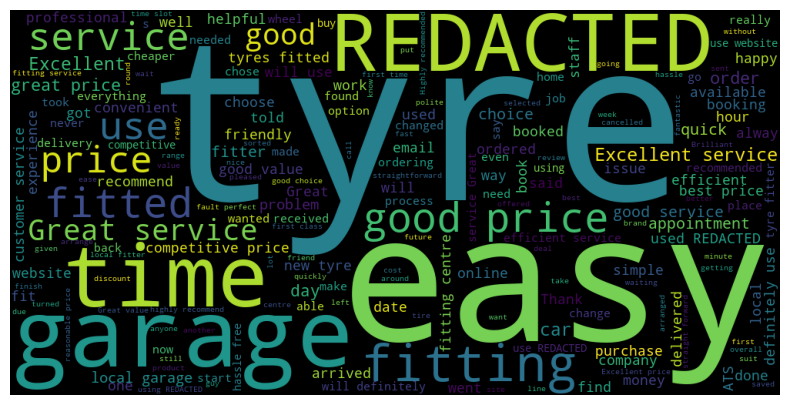

In [10]:
k= (' '.join(data['review']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### To use Tokenization Methode for Best 

##  Steps for Approach
## - Text Preprocessing
## - Subtheme Identification
## - Sentiment Analysis
## - Subtheme and Sentiment

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize #splits the input text into individual sentences 
from nltk.corpus import stopwords   #provides a list of common words that do not carry much meaning in a sentence
from nltk.stem import WordNetLemmatizer  #performs lemmatization, which is the process of reducing words to their base or dictionary form (lemma). For example, the words "running", "runs", and "runner" would all be reduced to their lemma "run". 
from textblob import TextBlob

### Perform Sentiment Analysis Using Pie Chart

### Primary Analysis Model sample Dataset

Sentiment: Positive
-------------------------------------------------------------


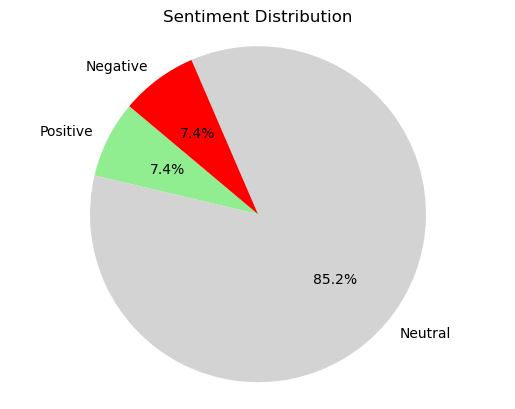

In [12]:
#sample Data in DATASET 
media_text = "Got 4 tyres Â£150 cheaper and was fitted at my local ats same week would recommend them to anyoneEverything done as expected. However either this fitter (ATS) or my local garage where I had a service done has put some finger marks on the inner roof lining. but I can't be sure which."

# Tokenization
words = nltk.word_tokenize(media_text)

# lowercasing
words = [word.lower() for word in words]

stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word for word in words if word.isalnum() and word not in stop_words]

blob = TextBlob(' '.join(words))

sentiment_polarity = blob.sentiment.polarity

# Analyze the sentiment of the text.

if sentiment_polarity > 0:
    sentiment_label = 'Positive'
elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Negative'

print(f"Sentiment: {sentiment_label}")
print('-------------------------------------------------------------')

import matplotlib.pyplot as plt

labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_polarity, 1 - abs(sentiment_polarity), abs(sentiment_polarity)]
colors = ['lightgreen', 'lightgrey', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

### Graphical Representation for Text Columns First 10 Rows

Easy Tyre Selection Process, Competitive Pricing and Excellent Fitting Service
Very easy to use and good value for money.
Really easy and convenient to arrange
It was so easy to select tyre sizes and arrange local fitting. The prices were competitive
service was excellent. Only slight downside was not knowing exact time at garage although the garage were so quick so I wasn't delayed
User friendly Website. Competitive Prices. Good communications. Efficient service by ATS Euromaster.
Excellent prices and service
It was very straightforward and the garage was great. Hadn't even known about them before
Use of local garage.
Easy to use, also good price.
Sentiment labels: ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive']


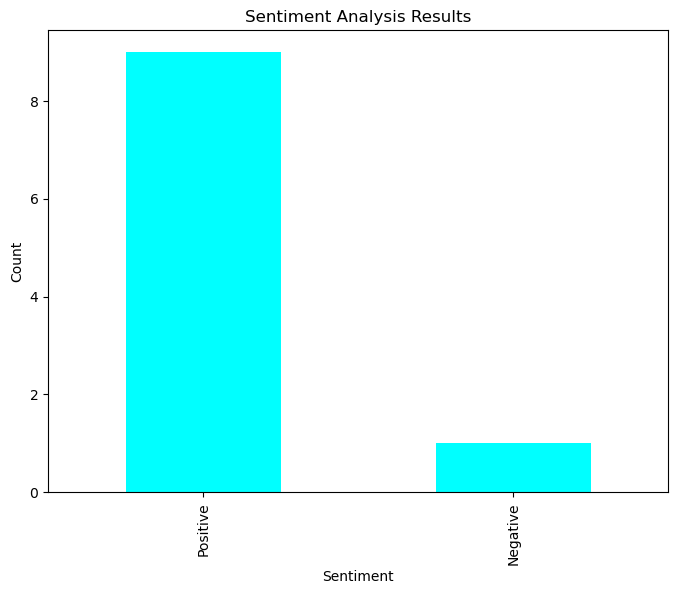

In [13]:
def Graphical_visual(graph):
    sentiment_labels = []
    
    # Create a list of the first 10 elements from the first column
    my_list = graph.iloc[:10, 0].tolist()
    for element in my_list:
        print(element)

        words = nltk.word_tokenize(element)
        
        words = [word.lower() for word in words]
    

        stop_words = set(nltk.corpus.stopwords.words('english'))
        words = [word for word in words if word.isalnum() and word not in stop_words]

        blob = TextBlob(' '.join(words))

        sentiment_polarity = blob.sentiment.polarity
        
        
        if sentiment_polarity > 0:
            sentiment_label = 'Positive'
        else:
            sentiment_label = 'Negative'
        
        sentiment_labels.append(sentiment_label)

    print(f"Sentiment labels: {sentiment_labels}")
    
    # Count the occurrences of each sentiment label
    sentiment_counts = pd.Series(sentiment_labels).value_counts()
    # Plot the results
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color = 'cyan')
    plt.title('Sentiment Analysis Results')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

Graphical_visual(data)

### Subtheme Sentimental Analysis

### Fuction Create for Preprocessing Data Set using nltk

### Text file copy and Past .......!

In [14]:
text = "Everything done as expected. However either this fitter (ATS) or my local garage where I had a service done has put some finger marks on the inner roof lining. but I can't be sure which."

In [15]:
def Preprocess_text(text):
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    Proces_Sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
        Proces_Sentences.append(' '.join(words))
    
    return Proces_Sentences

### Using Sklearn Machine Learning Model Feature extraction methods

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def Identify_Subtheme(Proces_Sentences):
    vectorizer = TfidfVectorizer()    
    X = vectorizer.fit_transform(Proces_Sentences) 
    
    num_clusters = 2
    if len(Proces_Sentences) < num_clusters:# to used single sentence will analysis
        num_clusters = len(Proces_Sentences)
        
    if num_clusters == 0:
        return {}
   
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    
    subthemes = {i: [] for i in range(num_clusters)}
    for i, label in enumerate(kmeans.labels_):
        subthemes[label].append(Proces_Sentences[i])
    
    return subthemes

In [17]:
from textblob import TextBlob

def Analyse_sentint(subthemes):
    subtheme_sentiments = {}
    for subtheme, sentences in subthemes.items():
        sentiment_score = 0
        for sentence in sentences:
            sentiment = TextBlob(sentence).sentiment.polarity
            sentiment_score += sentiment
            
        subtheme_sentiments[subtheme] = 'Positive' if sentiment_score > 0 else 'Negative' 
    
    return subtheme_sentiments

def Subtheme_analysis(text):
    Proces_Sentences = Preprocess_text(text)
    subthemes = Identify_Subtheme(Proces_Sentences)
    subtheme_sentiments = Analyse_sentint(subthemes)
    
    return subtheme_sentiments

result = Subtheme_analysis(text)

print(result)
print('----------------------------------------')
print(f'The text sentimental analysis {list(result.values())}')
print('----------------------------------------')

print(f'First line of sentence give {result[0]}')
print('----------------------------------------')
print(f'Secound line of sentence give {result[1]}')

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 'Negative', 1: 'Positive'}
----------------------------------------
The text sentimental analysis ['Negative', 'Positive']
----------------------------------------
First line of sentence give Negative
----------------------------------------
Secound line of sentence give Positive


## OutPut Graphical Representation

<class 'dict'>
['Negative', 'Positive']


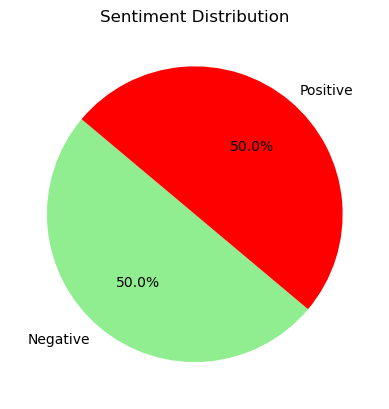

In [18]:
print(type(result))

labels = []
for x , y in result.items():
    labels.append(y)
    
print(labels)
    
labels_data=pd.DataFrame(labels)
label_count = labels_data.value_counts()
colors = ['lightgreen', 'red']
plt.pie(label_count, labels=labels,colors=colors, autopct='%.1f%%', startangle=140)
# plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

# RESULT

In [19]:

print(text)
print('------------------------------------------------------------------------------------------------------------------')
print(result)
print('----------------------------------------')
print(f'The text sentimental analysis {list(result.values())}')
print('----------------------------------------')
print(f'First line of sentence give: {result[0]}')
print('----------------------------------------')
print(f'Secound line of sentence give: {result[1]}')

Everything done as expected. However either this fitter (ATS) or my local garage where I had a service done has put some finger marks on the inner roof lining. but I can't be sure which.
------------------------------------------------------------------------------------------------------------------
{0: 'Negative', 1: 'Positive'}
----------------------------------------
The text sentimental analysis ['Negative', 'Positive']
----------------------------------------
First line of sentence give: Negative
----------------------------------------
Secound line of sentence give: Positive


In [ ]:
# to savwe in New CSv file ............!
# model Buliding